# Clustering

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv", index_col="CustomerID", usecols=["CustomerID", "Gender","Annual Income (k$)", "Age", "Spending Score (1-100)"])
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [ ]:
# Pasamos el género a dummies
df=pd.get_dummies(df, columns=["Gender"])

# Normalizamos las columnas
df["Age"] = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())
df["Annual Income (k$)"] = (df["Annual Income (k$)"] - df["Annual Income (k$)"].min()) / (df["Annual Income (k$)"].max() - df["Annual Income (k$)"].min())
df["Spending Score (1-100)"] = (df["Spending Score (1-100)"] - df["Spending Score (1-100)"].min()) / (df["Spending Score (1-100)"].max() - df["Spending Score (1-100)"].min())

df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,0.019231,0.000000,0.387755,0,1
2,0.057692,0.000000,0.816327,0,1
3,0.038462,0.008197,0.051020,1,0
4,0.096154,0.008197,0.775510,1,0
5,0.250000,0.016393,0.397959,1,0


# Clustering Kmedias

In [ ]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Age vs Spending Score (1-100)
c1 = "Age"
c2 = "Spending Score (1-100)"
inercias = []
for n in range(1, 11):
    km = KMeans(n_clusters=n, init='k-means++', random_state=42)
    km.fit(df[[c1, c2]])
    inercias.append(km.inertia_)

inercias
# Inercia: Suma de las distancias al cuadrado de los puntos a su centroide más cercano

[28.178337844315358,
 13.337690580804237,
 8.742042168276535,
 6.350246319122475,
 5.026143351352524,
 3.762796809327068,
 3.310446181738137,
 2.781552120356593,
 2.406636281222873,
 2.03551214561825]

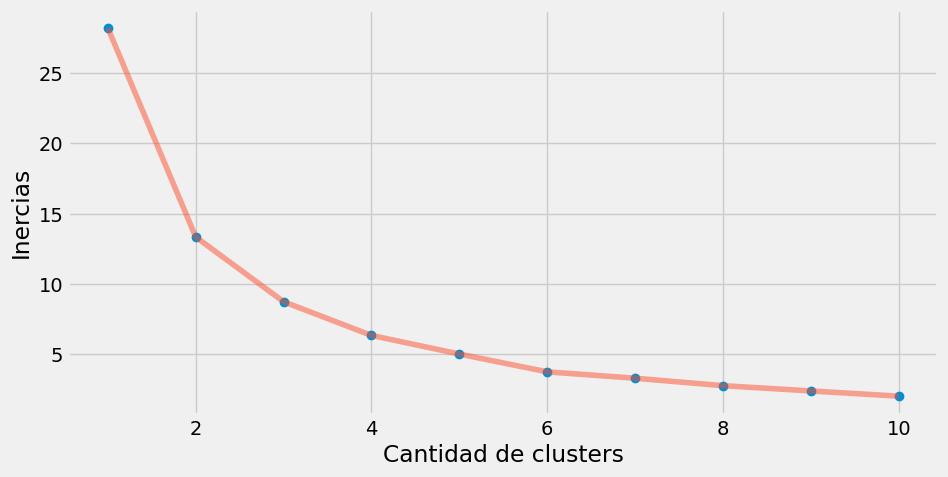

In [ ]:
# Graficamos la curva de inercias para ver el codo
plt.figure(1, figsize=(10, 5))
plt.plot(range(1, 11) , inercias , 'o')
plt.plot(range(1, 11) , inercias , '-' , alpha=0.5)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercias')
plt.show()

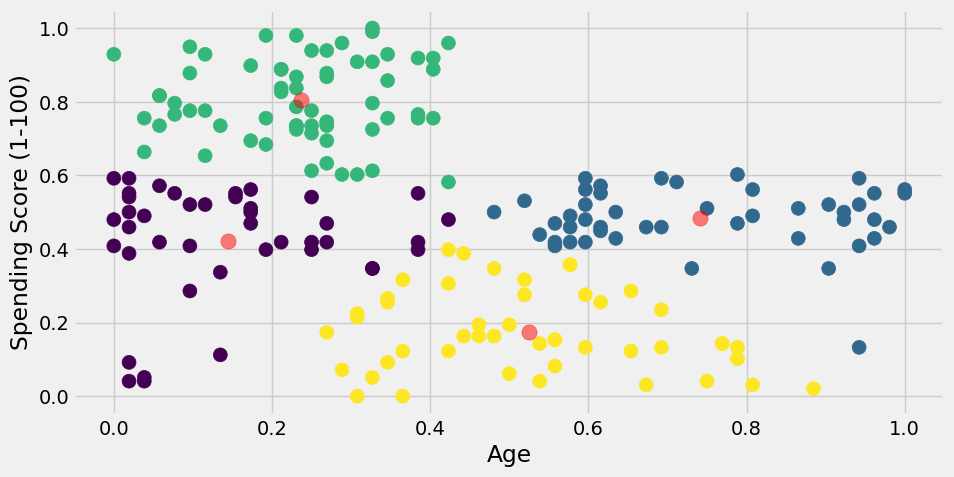

In [ ]:
# Tomamos k=4 y entrenamos
k = 4
km = KMeans(n_clusters=k, init='k-means++', random_state=42)
km.fit(df[[c1, c2]])

labels = km.labels_
centroids = km.cluster_centers_

# Graficamos
plt.figure(1, figsize=(10, 5))
plt.scatter(x=c1, y=c2, data=df[[c1, c2]], c=labels, s=100)
plt.scatter(x=centroids[:, 0] , y=centroids[:, 1], s=120 , c="red", alpha=0.5)
plt.xlabel(c1)
plt.ylabel(c2)
plt.show()

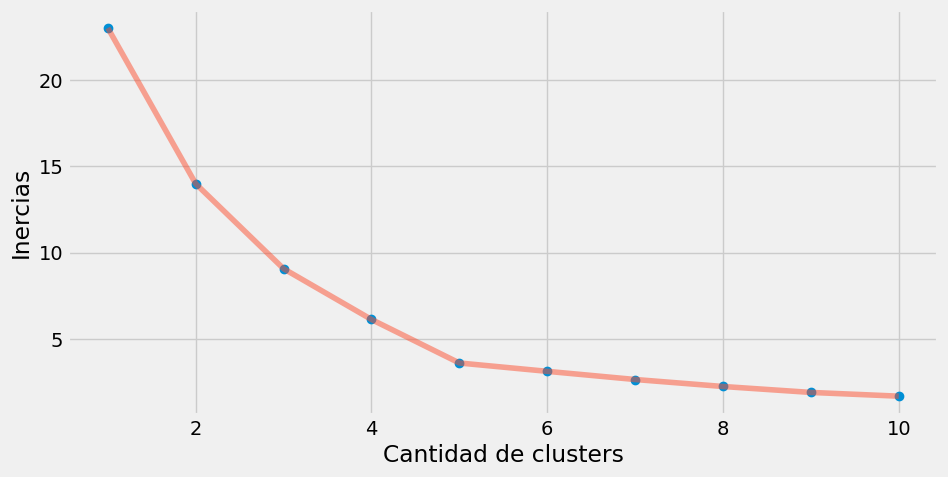

In [ ]:
# Annual Income (k$) vs Spending Score (1-100)

c1 = "Annual Income (k$)"  # Ingresos anuales
c2 = "Spending Score (1-100)" # Puntuación de gastos
inercias=[]
for n in range(1, 11):
    km = KMeans(n_clusters=n, init='k-means++', random_state=42)
    km.fit(df[[c1, c2]])
    inercias.append(km.inertia_)

# Curva de inercias
plt.figure(1, figsize=(10, 5))
plt.plot(range(1, 11) , inercias , 'o')
plt.plot(range(1, 11) , inercias , '-' , alpha=0.5)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercias')
plt.show()

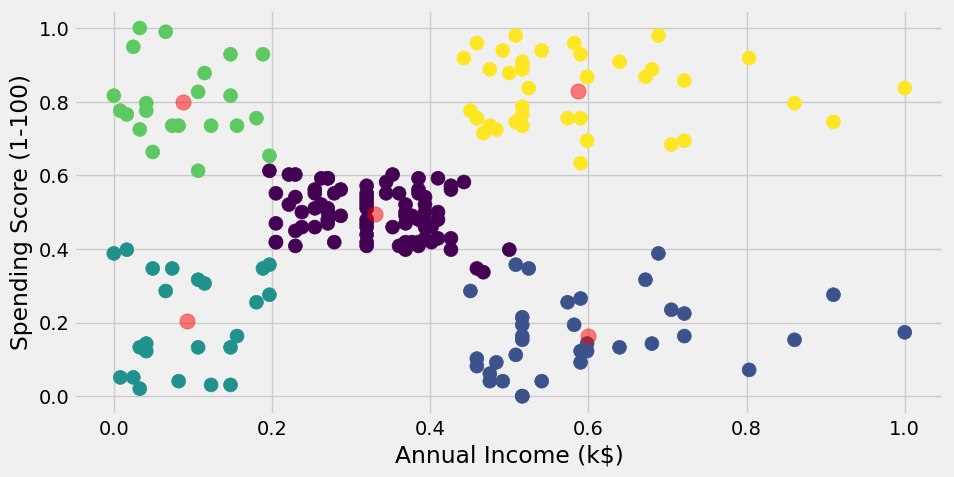

In [ ]:
# Tomamos k=5 y entrenamos...
k = 5
km = KMeans(n_clusters=k, init='k-means++', random_state=42)
km.fit(df[[c1, c2]])

# y graficamos
plt.figure(1, figsize=(10, 5))
plt.scatter(x=c1, y=c2, data=df[[c1, c2]], c=km.labels_, s=100)
plt.scatter(x=km.cluster_centers_[:, 0] , y=km.cluster_centers_[:, 1], s=120 , c="red", alpha=0.5)
plt.xlabel(c1)
plt.ylabel(c2)
plt.show()

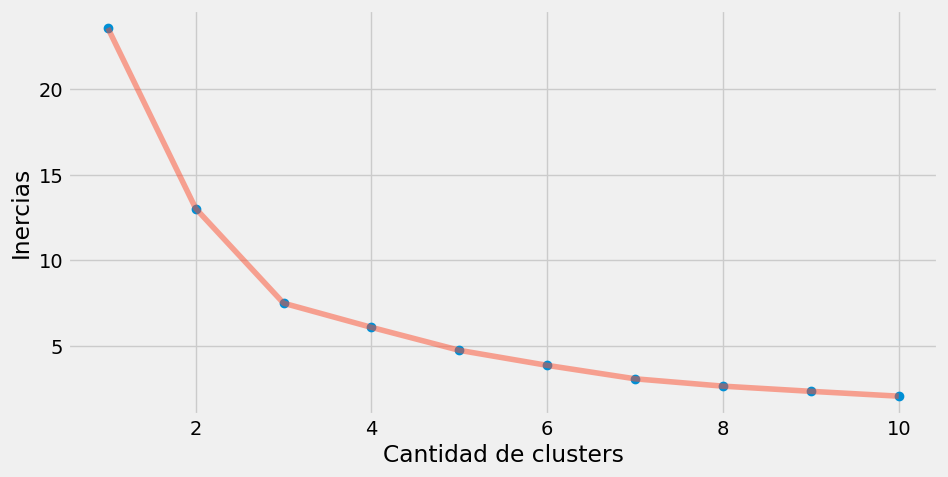

In [ ]:
# Annual Income (k$) vs Age

c1 = "Annual Income (k$)"
c2 = "Age"
inercias=[]
for n in range(1, 11):
    km=KMeans(n_clusters=n, init='k-means++', random_state=42)
    km.fit(df[[c1, c2]])
    inercias.append(km.inertia_)

# Curva de inercias
plt.figure(1, figsize=(10, 5))
plt.plot(range(1, 11) , inercias , 'o')
plt.plot(range(1, 11) , inercias , '-' , alpha=0.5)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercias')
plt.show()

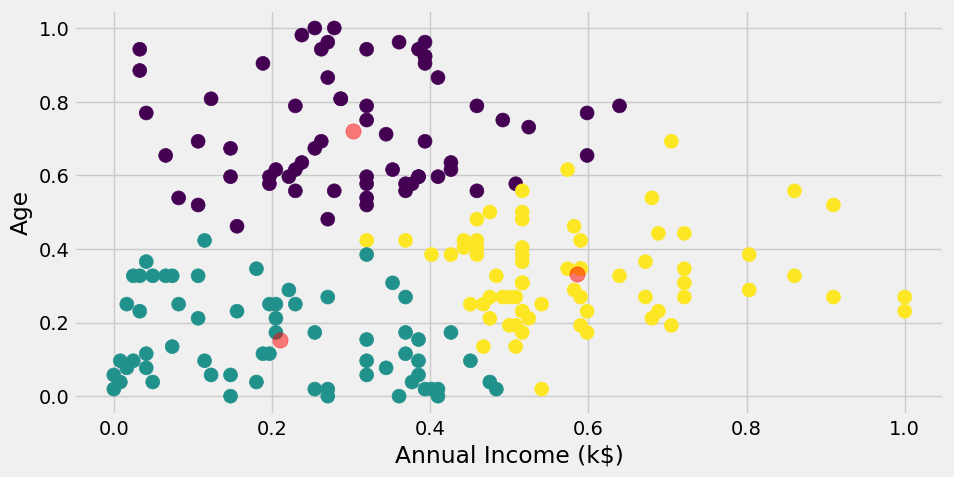

In [ ]:
# Tomamos k=3 y entrenamos...
k = 3
km = KMeans(n_clusters=k, init='k-means++', random_state=42)
km.fit(df[[c1, c2]])

# y graficamos
plt.figure(1, figsize=(10, 5))
plt.scatter(x=c1, y=c2, data=df[[c1, c2]], c=km.labels_, s=100)
plt.scatter(x=km.cluster_centers_[:, 0] , y=km.cluster_centers_[:, 1], s=120 , c="red", alpha=0.5)
plt.xlabel(c1)
plt.ylabel(c2)
plt.show()

In [ ]:
# Todo junto en 3D 
c1 = "Annual Income (k$)"
c2 = "Age"
c3 = "Spending Score (1-100)"

k = 6
km = KMeans(n_clusters=k, init='k-means++', random_state=42)
km.fit(df[[c1, c2, c3]])

trace = go.Scatter3d(x= df[c1], y= df[c2], z= df[c3], mode='markers', marker=dict(color=labels, size=20, line=dict(color=labels, width=6), opacity=0.8))
layout = go.Layout(title= 'Clusters', scene=dict(xaxis=dict(title=c1), yaxis=dict(title=c2), zaxis=dict(title=c3)))
fig = go.Figure(data=trace, layout=layout)
py.offline.iplot(fig)

# Clustering jerárquico

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

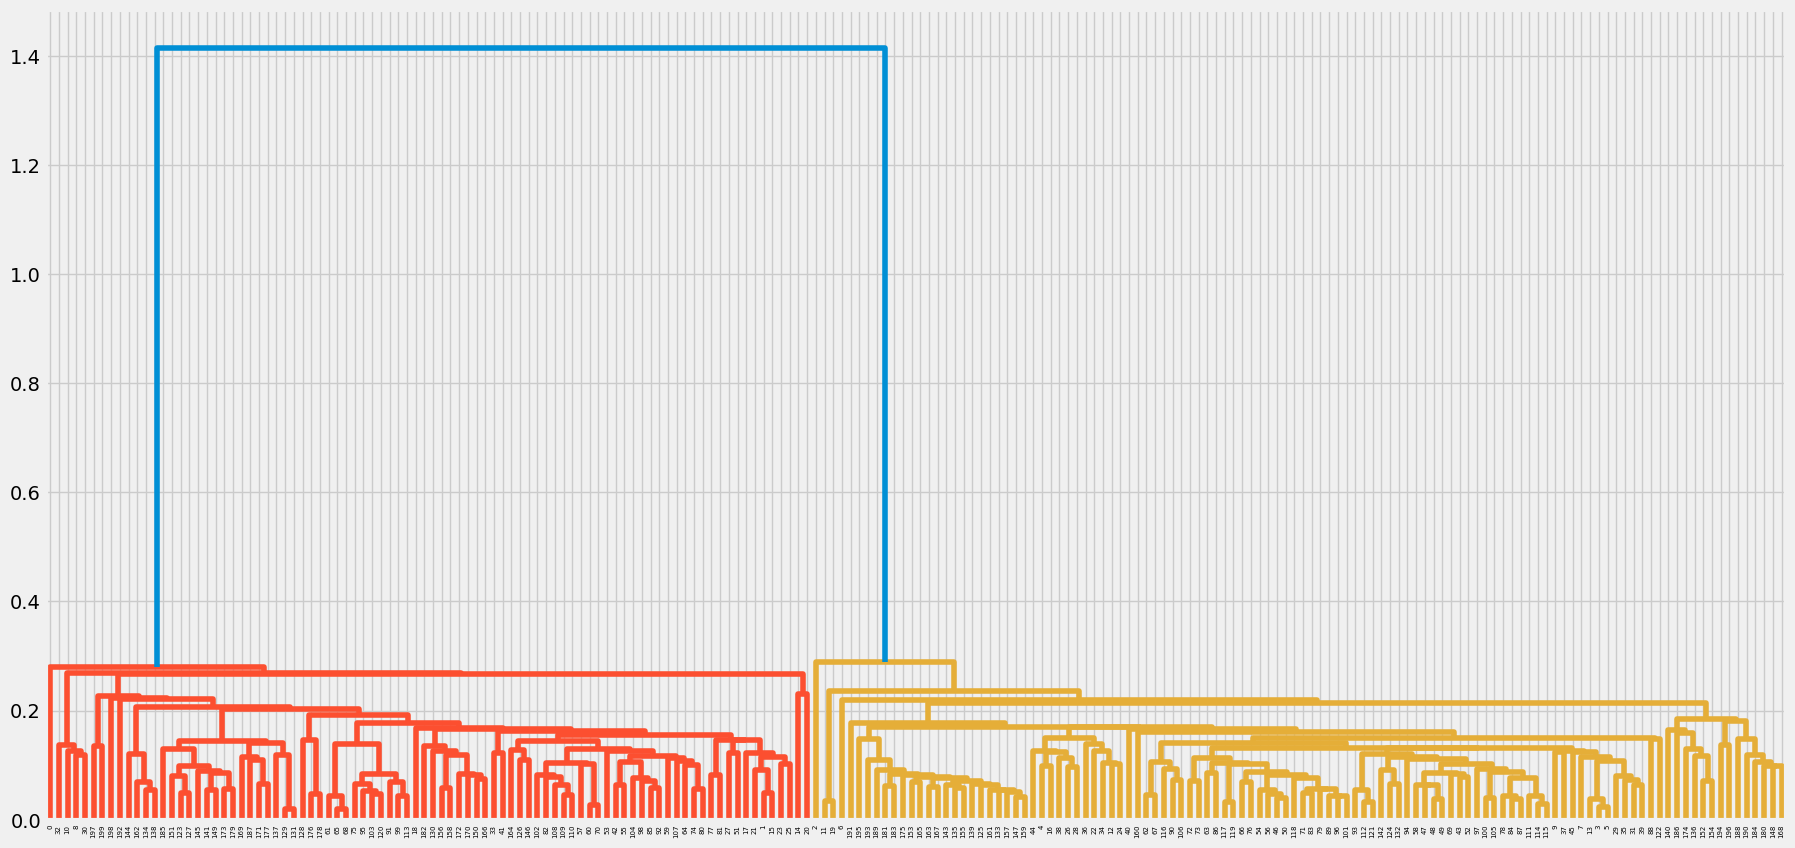

In [ ]:
# punto más cercano, distancia euclideana
single_clustering = linkage(df, method="single", metric="euclidean")

plt.figure(3, figsize=(20, 10))
dendrogram(single_clustering)
plt.show()

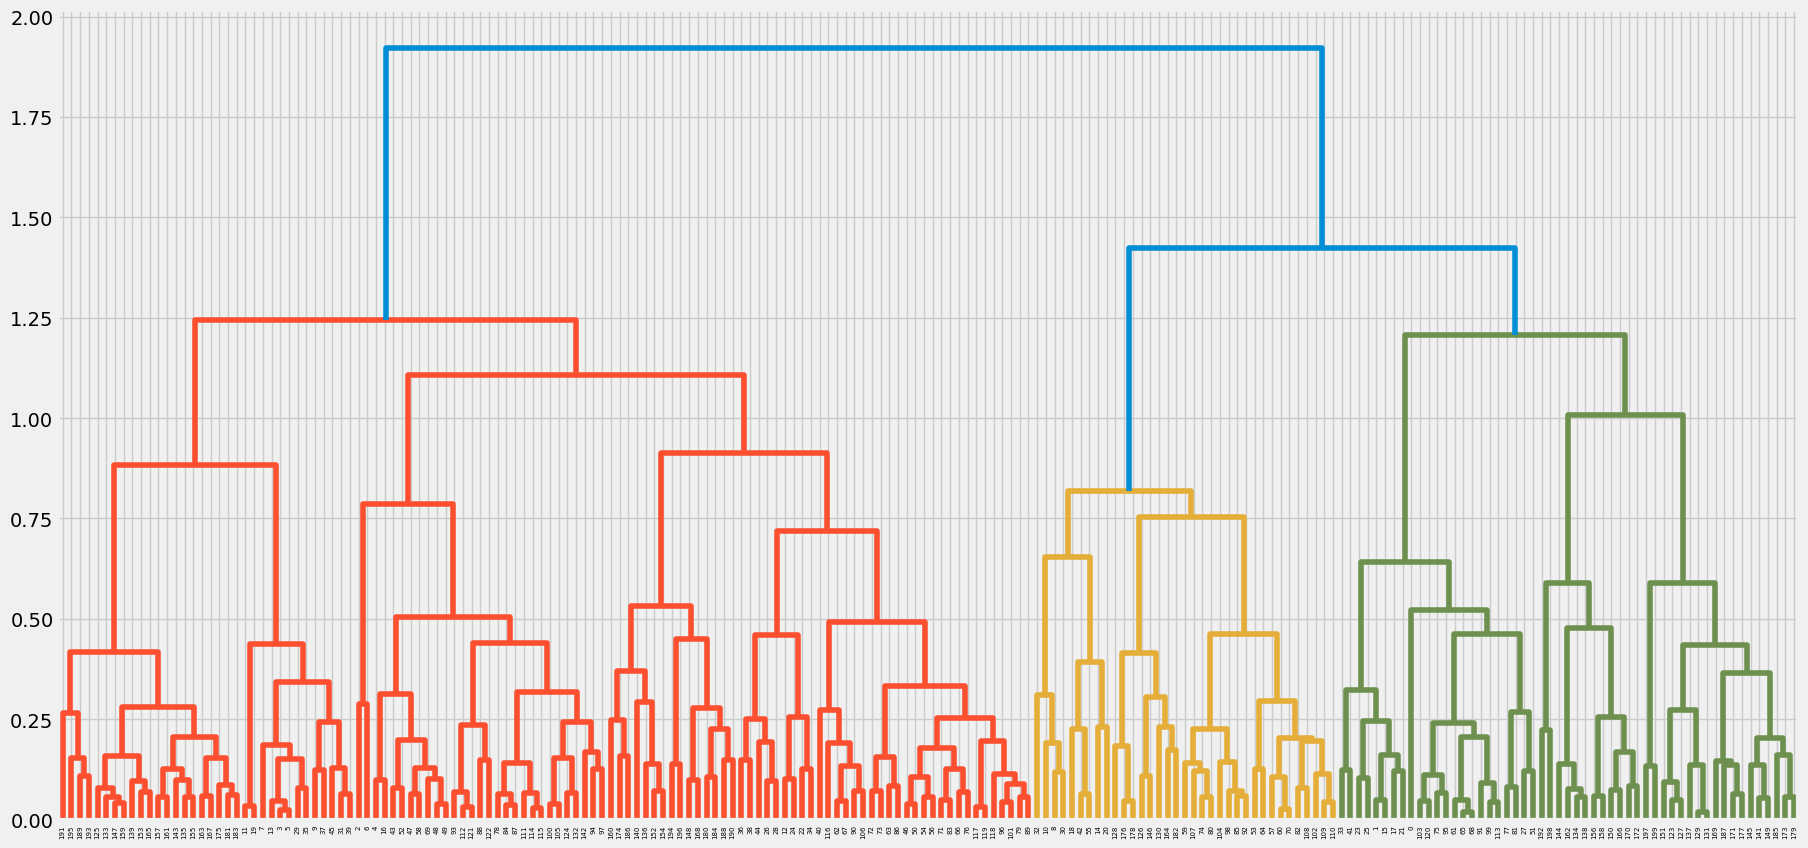

In [ ]:
# punto más lejano, distancia euclideana
complete_clustering = linkage(df, method="complete", metric="euclidean")

plt.figure(1, figsize=(20, 10))
dendrogram(complete_clustering)
plt.show()

# UPGMA

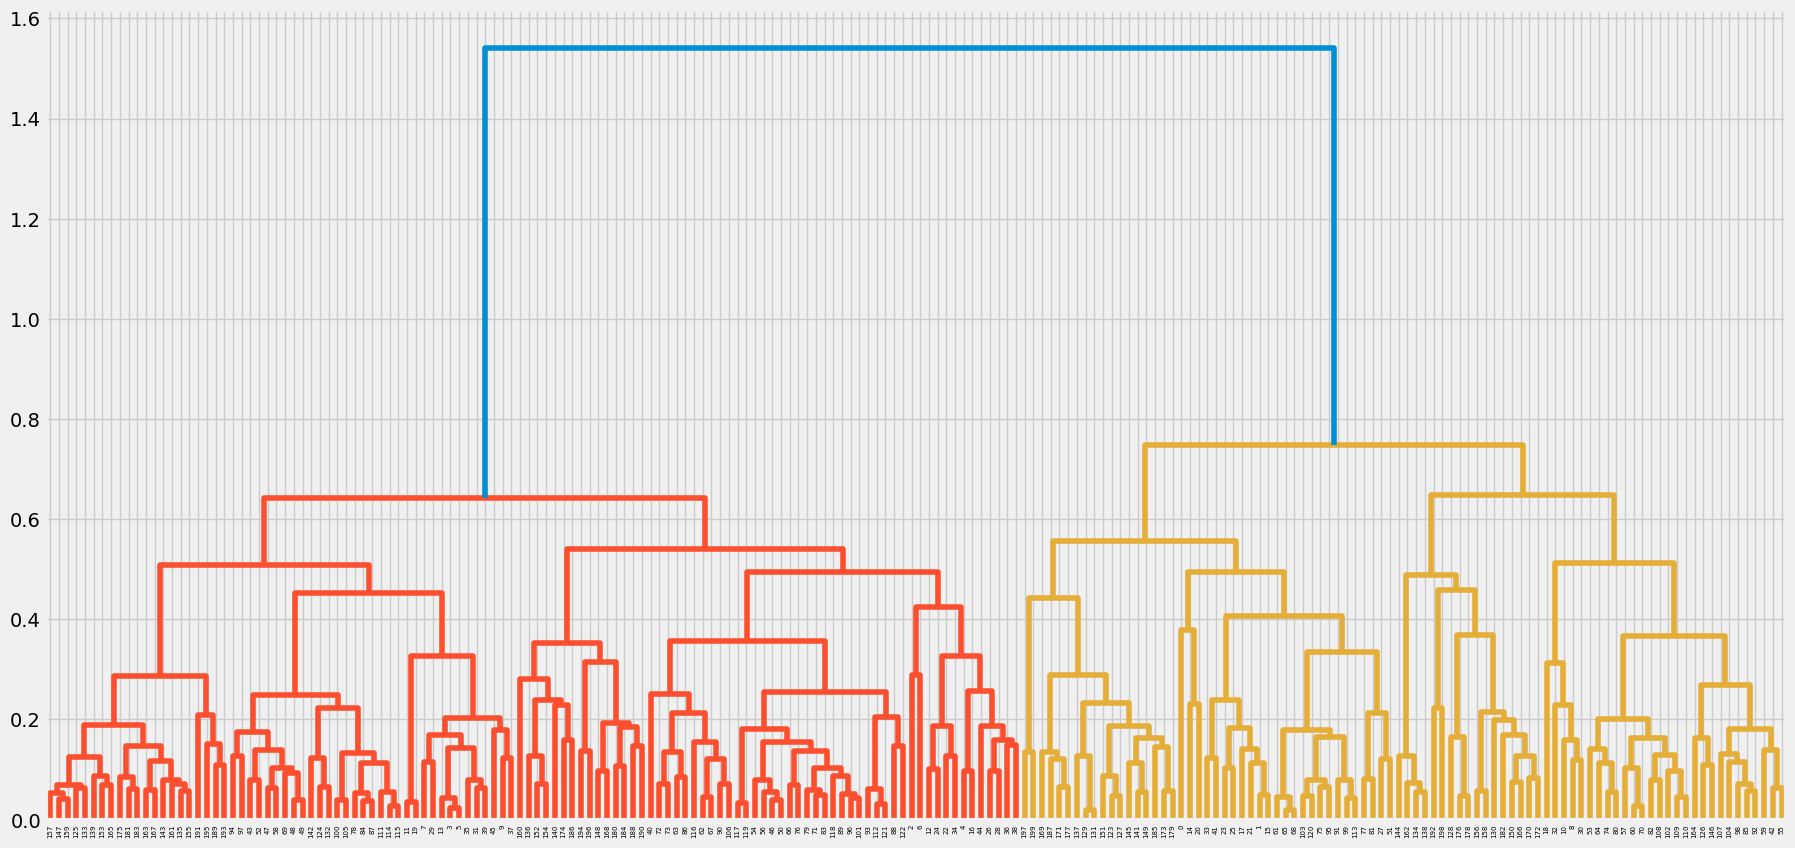

In [ ]:
# promedio de puntos, distancia euclideana -- UPGMA
average_clustering = linkage(df, method="average", metric="euclidean")

plt.figure(2, figsize=(20, 10))
dendrogram(average_clustering)
plt.show()

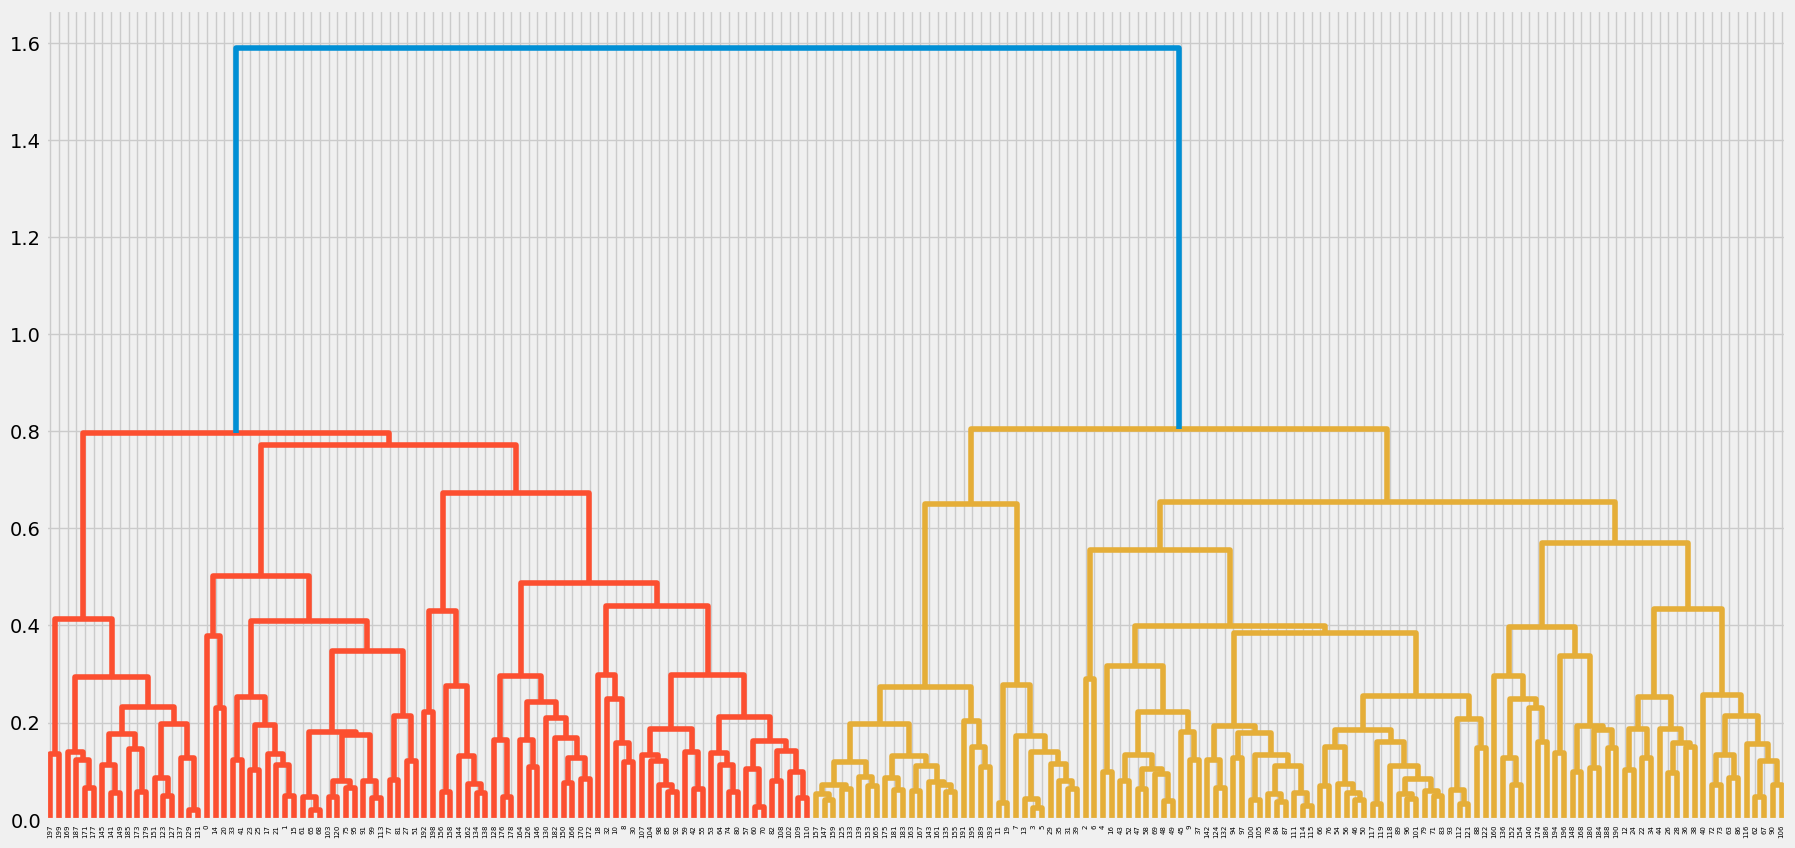

In [ ]:
# UPGMA ponderado, distancia euclideana
weighted_clustering = linkage(df, method="weighted", metric="euclidean")

plt.figure(4, figsize=(20, 10))
dendrogram(weighted_clustering)
plt.show()

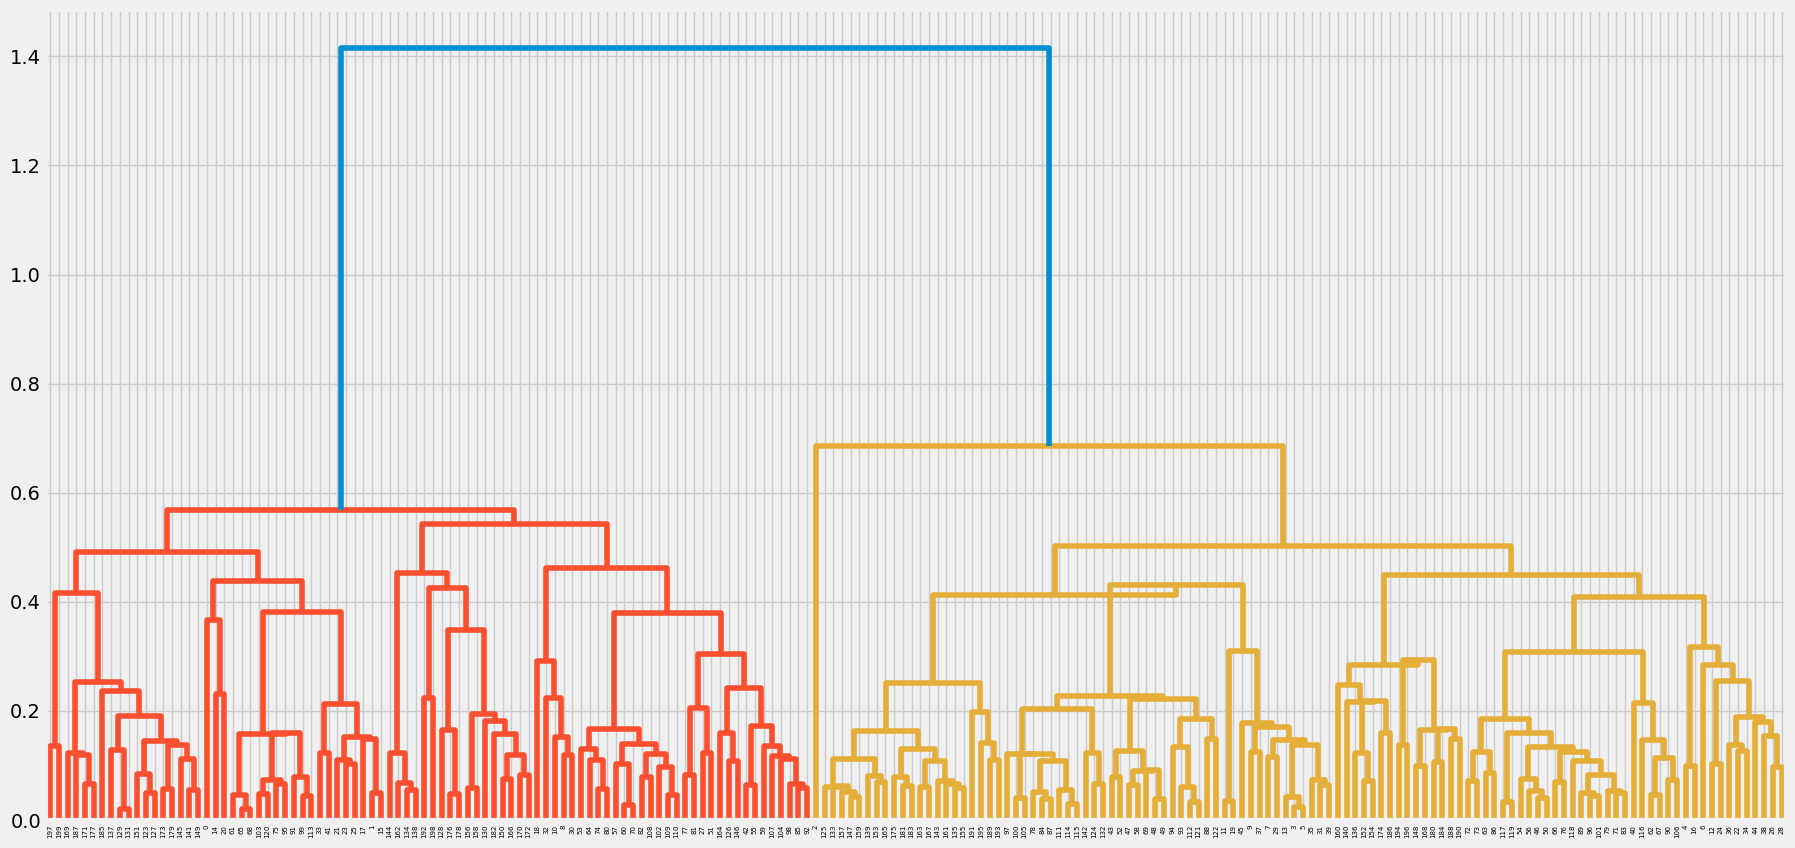

In [ ]:
# distancia entre centroides, distancia euclideana
centroid_clustering = linkage(df, method="centroid", metric="euclidean")

plt.figure(5, figsize=(20, 10))
dendrogram(centroid_clustering)
plt.show()